In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
datasets = {
    "USA": {
        "ML": pd.read_csv("ml_baseline_results.csv"),
        "TS": pd.read_csv("ts_model_results.csv"),
        "Fusion": pd.read_csv("fusion_model_results.csv")
    },
    "UK": {
        "ML": pd.read_csv("uk_ml_baseline_results.csv"),
        "TS": pd.read_csv("uk_ts_model_results.csv"),
        "Fusion": pd.read_csv("uk_fusion_model_results.csv")
    },
    "India": {
        "ML": pd.read_csv("India_ml_baseline_results.csv"),
        "TS": pd.read_csv("India_ts_model_results.csv"),
        "Fusion": pd.read_csv("India_fusion_model_results.csv")
    },
    "China": {
        "ML": pd.read_csv("china_ml_baseline_results.csv"),
        "TS": pd.read_csv("china_ts_model_results.csv"),
        "Fusion": pd.read_csv("china_fusion_model_results.csv")
    },
    "Frontier": {
        "ML": pd.read_csv("fm_ml_baseline_results.csv"),
        "TS": pd.read_csv("fm_ts_model_results.csv"),
        "Fusion": pd.read_csv("fm_fusion_model_results.csv")
    }
}

In [2]:
summary_rows = []

for market, models in datasets.items():
    for model_type, df in models.items():
        avg_r2 = df["R2"].mean()
        avg_rmse = df["RMSE"].mean()
        avg_mae = df["MAE"].mean()

        summary_rows.append({
            "Market": market,
            "Model Type": model_type,
            "Avg R2": round(avg_r2, 4),
            "Avg RMSE": round(avg_rmse, 6),
            "Avg MAE": round(avg_mae, 4),
            "Market Type": "Developed" if market in ["USA", "UK"] else
                           "Emerging" if market in ["India", "China"] else
                           "Frontier"
        })

summary_df = pd.DataFrame(summary_rows)
display(summary_df)

,Market,Model Type,Avg R2,Avg RMSE,Avg MAE,Market Type
0,USA,ML,2.424000e-01,3.023000e-03,2.200000e-03,Developed
1,USA,TS,-inf,9.684366e+148,2.518182e+147,Developed
2,USA,Fusion,-1.274800e+00,4.124000e-03,3.300000e-03,Developed
3,UK,ML,-2.750000e-01,3.693000e-03,2.800000e-03,Developed
4,UK,TS,-4.398021e+267,9.277578e+130,2.405100e+129,Developed
5,UK,Fusion,-1.051700e+00,3.731000e-03,3.000000e-03,Developed
6,India,ML,-3.659000e-01,3.390000e-03,2.700000e-03,Emerging
7,India,TS,-inf,1.075176e+149,2.845219e+147,Emerging
8,India,Fusion,-1.806500e+00,2.966000e-03,2.500000e-03,Emerging
9,China,ML,3.785000e-01,2.867000e-03,2.200000e-03,Emerging


/shared/courseSharedFolders/142601outer/142601/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/shared/courseSharedFolders/142601outer/142601/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/shared/courseSharedFolders/142601outer/142601/cs109b/lib/python3.11/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.


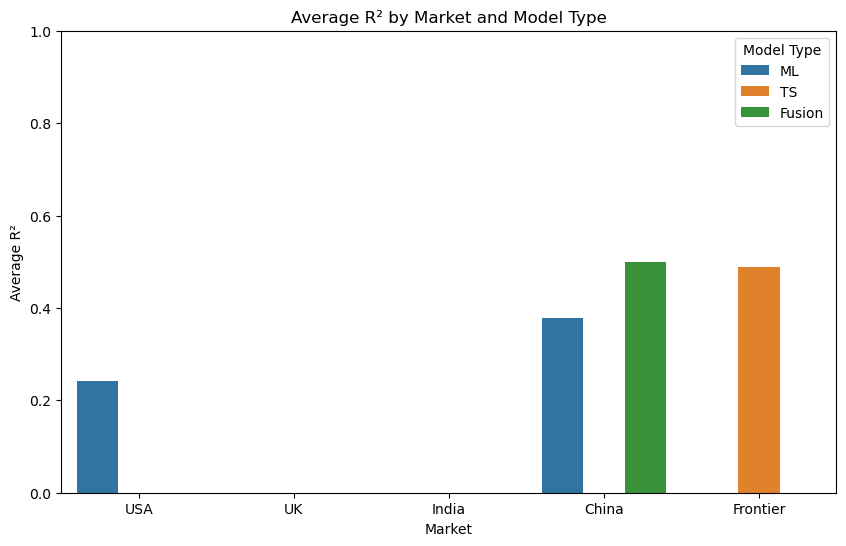

In [3]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=summary_df, x="Market", y="Avg R2", hue="Model Type")
plt.title("Average R² by Market and Model Type")
plt.ylabel("Average R²")
plt.ylim(0, 1)
plt.show()

In [4]:
import pandas as pd

# Define file paths per market and model type
csv_paths = {
    "USA": {
        "ML": "ml_baseline_results.csv",
        "TS": "ts_model_results.csv",
        "Fusion": "fusion_model_results.csv"
    },
    "UK": {
        "ML": "uk_ml_baseline_results.csv",
        "TS": "uk_ts_model_results.csv",
        "Fusion": "uk_fusion_model_results.csv"
    },
    "India": {
        "ML": "India_ml_baseline_results.csv",
        "TS": "India_ts_model_results.csv",
        "Fusion": "India_fusion_model_results.csv"
    },
    "China": {
        "ML": "china_ml_baseline_results.csv",
        "TS": "china_ts_model_results.csv",
        "Fusion": "china_fusion_model_results.csv"
    },
    "Frontier": {
        "ML": "fm_ml_baseline_results.csv",
        "TS": "fm_ts_model_results.csv",
        "Fusion": "fm_fusion_model_results.csv"
    }
}

# Label market types
market_types = {
    "USA": "Developed",
    "UK": "Developed",
    "India": "Emerging",
    "China": "Emerging",
    "Frontier": "Frontier"
}

# Summary list
summary = []

# Build summary table
for market, models in csv_paths.items():
    for model_type, file_path in models.items():
        df = pd.read_csv(file_path)
        summary.append({
            "Market": market,
            "Market Type": market_types[market],
            "Model Type": model_type,
            "Avg R2": round(df["R2"].mean(), 4),
            "Avg RMSE": round(df["RMSE"].mean(), 6),
            "Avg MAE": round(df["MAE"].mean(), 6)
        })

summary_df = pd.DataFrame(summary)

# Create individual tables
r2_table = summary_df.pivot(index="Market", columns="Model Type", values="Avg R2")
rmse_table = summary_df.pivot(index="Market", columns="Model Type", values="Avg RMSE")
mae_table = summary_df.pivot(index="Market", columns="Model Type", values="Avg MAE")
market_level_summary = summary_df.groupby("Market Type")[["Avg R2", "Avg RMSE", "Avg MAE"]].mean().round(4)

# Print tables
print("\n=== Average R² by Market & Model Type ===")
print(r2_table)

print("\n=== Average RMSE by Market & Model Type ===")
print(rmse_table)

print("\n=== Average MAE by Market & Model Type ===")
print(mae_table)

print("\n=== Market-Level Aggregated Metrics ===")
print(market_level_summary)


=== Average R² by Market & Model Type ===
Model Type  Fusion      ML             TS
Market                                   
China       0.4990  0.3785           -inf
Frontier   -0.1453 -1.0633   4.894000e-01
India      -1.8065 -0.3659           -inf
UK         -1.0517 -0.2750 -4.398021e+267
USA        -1.2748  0.2424           -inf

=== Average RMSE by Market & Model Type ===
Model Type    Fusion        ML             TS
Market                                       
China       0.003186  0.002867  2.407376e+149
Frontier    0.001340  0.002460   3.933000e-03
India       0.002966  0.003390  1.075176e+149
UK          0.003731  0.003693  9.277578e+130
USA         0.004124  0.003023  9.684366e+148

=== Average MAE by Market & Model Type ===
Model Type    Fusion        ML             TS
Market                                       
China       0.002239  0.002170  8.009443e+147
Frontier    0.000960  0.001300   1.933000e-03
India       0.002503  0.002713  2.845219e+147
UK          0.003014  

In [5]:
import pandas as pd

# Define your CSV files per region and model type
csv_paths = {
    "USA": {
        "ML": "ml_baseline_results.csv",
        "TS": "ts_model_results.csv",
        "Fusion": "fusion_model_results.csv"
    },
    "UK": {
        "ML": "uk_ml_baseline_results.csv",
        "TS": "uk_ts_model_results.csv",
        "Fusion": "uk_fusion_model_results.csv"
    },
    "India": {
        "ML": "India_ml_baseline_results.csv",
        "TS": "India_ts_model_results.csv",
        "Fusion": "India_fusion_model_results.csv"
    },
    "China": {
        "ML": "china_ml_baseline_results.csv",
        "TS": "china_ts_model_results.csv",
        "Fusion": "china_fusion_model_results.csv"
    },
    "Frontier": {
        "ML": "fm_ml_baseline_results.csv",
        "TS": "fm_ts_model_results.csv",
        "Fusion": "fm_fusion_model_results.csv"
    }
}

market_type_map = {
    "USA": "Developed",
    "UK": "Developed",
    "India": "Emerging",
    "China": "Emerging",
    "Frontier": "Frontier"
}

# Collect all data into one big DataFrame
all_results = []

for country, model_types in csv_paths.items():
    for model_type, file_path in model_types.items():
        df = pd.read_csv(file_path)
        model_column = "Model" if model_type != "Fusion" else "Fusion_Model"

        for _, row in df.iterrows():
            all_results.append({
                "Country": country,
                "Market Type": market_type_map[country],
                "Model Category": model_type,
                "Model Name": row[model_column],
                "R2": row["R2"],
                "RMSE": row["RMSE"],
                "MAE": row["MAE"]
            })

all_results_df = pd.DataFrame(all_results)

# 1️⃣ Group by Country + Model Name
model_perf_by_country = all_results_df.groupby(["Country", "Model Name"])[["R2", "RMSE", "MAE"]].mean().round(4)

# 2️⃣ Group by Market Type + Model Name
model_perf_by_market_type = all_results_df.groupby(["Market Type", "Model Name"])[["R2", "RMSE", "MAE"]].mean().round(4)

# Display tables
print("\n📄 Table A: Model performance per country")
print(model_perf_by_country)

print("\n📄 Table B: Model performance per market type")
print(model_perf_by_market_type)


📄 Table A: Model performance per country
                                   R2           RMSE            MAE
Country Model Name                                                 
China   AdaBoost               0.8251   2.000000e-03   1.500000e-03
        CatBoost               0.8787   1.700000e-03   1.200000e-03
        EGARCH                   -inf  7.222127e+149  2.402833e+148
        EGARCH_pred+AdaBoost   0.7658   2.400000e-03   1.700000e-03
        EGARCH_pred+CatBoost   0.7607   2.500000e-03   1.600000e-03
...                               ...            ...            ...
USA     GJR_pred+RandomForest  0.8474   1.700000e-03   1.200000e-03
        GJR_pred+XGBoost       0.7714   2.000000e-03   1.500000e-03
        KNN                   -1.9964   7.600000e-03   5.900000e-03
        RandomForest           0.8356   1.700000e-03   1.200000e-03
        XGBoost                0.8203   1.800000e-03   1.200000e-03

[115 rows x 3 columns]

📄 Table B: Model performance per market type
    

In [6]:
# Sort and extract best models per country
best_by_country_r2 = all_results_df.sort_values(by="R2", ascending=False).groupby("Country").first()[["Model Name", "R2"]]
best_by_country_rmse = all_results_df.sort_values(by="RMSE").groupby("Country").first()[["Model Name", "RMSE"]]
best_by_country_mae = all_results_df.sort_values(by="MAE").groupby("Country").first()[["Model Name", "MAE"]]

# Sort and extract best models per market type
best_by_market_r2 = all_results_df.sort_values(by="R2", ascending=False).groupby("Market Type").first()[["Model Name", "R2"]]
best_by_market_rmse = all_results_df.sort_values(by="RMSE").groupby("Market Type").first()[["Model Name", "RMSE"]]
best_by_market_mae = all_results_df.sort_values(by="MAE").groupby("Market Type").first()[["Model Name", "MAE"]]

# Print results
print("\n🏆 Best Models by Country (R²):")
print(best_by_country_r2)

print("\n🏆 Best Models by Country (RMSE):")
print(best_by_country_rmse)

print("\n🏆 Best Models by Country (MAE):")
print(best_by_country_mae)

print("\n🌍 Best Models by Market Type (R²):")
print(best_by_market_r2)

print("\n🌍 Best Models by Market Type (RMSE):")
print(best_by_market_rmse)

print("\n🌍 Best Models by Market Type (MAE):")
print(best_by_market_mae)


🏆 Best Models by Country (R²):
                 Model Name      R2
Country                            
China               XGBoost  0.9622
Frontier  GJR_pred+CatBoost  0.8317
India          RandomForest  0.9185
UK                  XGBoost  0.9454
USA                CatBoost  0.9235

🏆 Best Models by Country (RMSE):
                       Model Name    RMSE
Country                                  
China                    CatBoost  0.0008
Frontier        GJR_pred+CatBoost  0.0006
India          GARCH_pred+XGBoost  0.0005
UK            GARCH_pred+AdaBoost  0.0009
USA       GARCH_pred+RandomForest  0.0009

🏆 Best Models by Country (MAE):
                   Model Name     MAE
Country                              
China                CatBoost  0.0005
Frontier    GJR_pred+CatBoost  0.0005
India      GARCH_pred+XGBoost  0.0005
UK        GARCH_pred+AdaBoost  0.0006
USA          GJR_pred+XGBoost  0.0007

🌍 Best Models by Market Type (R²):
                    Model Name      R2
Market Type   

In [7]:
# Sort once for efficiency
sorted_by_r2 = all_results_df.sort_values(by="R2", ascending=False)
sorted_by_rmse = all_results_df.sort_values(by="RMSE")
sorted_by_mae = all_results_df.sort_values(by="MAE")

# 1️⃣ Top 2 by R²
top2_by_country_r2 = sorted_by_r2.groupby("Country").head(2)[["Country", "Model Name", "R2"]]
top2_by_market_r2 = sorted_by_r2.groupby("Market Type").head(2)[["Market Type", "Model Name", "R2"]]

# 2️⃣ Top 2 by RMSE
top2_by_country_rmse = sorted_by_rmse.groupby("Country").head(2)[["Country", "Model Name", "RMSE"]]
top2_by_market_rmse = sorted_by_rmse.groupby("Market Type").head(2)[["Market Type", "Model Name", "RMSE"]]

# 3️⃣ Top 2 by MAE
top2_by_country_mae = sorted_by_mae.groupby("Country").head(2)[["Country", "Model Name", "MAE"]]
top2_by_market_mae = sorted_by_mae.groupby("Market Type").head(2)[["Market Type", "Model Name", "MAE"]]

# Print tables
print("\n🏆 Top 2 Models by Country (R²):")
print(top2_by_country_r2)

print("\n🏆 Top 2 Models by Country (RMSE):")
print(top2_by_country_rmse)

print("\n🏆 Top 2 Models by Country (MAE):")
print(top2_by_country_mae)

print("\n🌍 Top 2 Models by Market Type (R²):")
print(top2_by_market_r2)

print("\n🌍 Top 2 Models by Market Type (RMSE):")
print(top2_by_market_rmse)

print("\n🌍 Top 2 Models by Market Type (MAE):")
print(top2_by_market_mae)


🏆 Top 2 Models by Country (R²):
       Country                Model Name      R2
809      China                   XGBoost  0.9622
793      China                  CatBoost  0.9492
305         UK                   XGBoost  0.9454
304         UK                  CatBoost  0.9399
42         USA                  CatBoost  0.9235
547      India              RandomForest  0.9185
196        USA  EGARCH_pred+RandomForest  0.9176
576      India                   XGBoost  0.9159
1082  Frontier         GJR_pred+CatBoost  0.8317
1087  Frontier      EGARCH_pred+CatBoost  0.8233

🏆 Top 2 Models by Country (RMSE):
       Country                Model Name    RMSE
775      India        GARCH_pred+XGBoost  0.0005
779      India          GJR_pred+XGBoost  0.0005
1082  Frontier         GJR_pred+CatBoost  0.0006
1087  Frontier      EGARCH_pred+CatBoost  0.0007
793      China                  CatBoost  0.0008
795      China              RandomForest  0.0008
186        USA   GARCH_pred+RandomForest  0.0009
1

In [2]:
import pandas as pd

# Define paths
csv_paths = {
    "USA": {
        "ML": "ml_baseline_results.csv",
        "TS": "ts_model_results.csv",
        "Fusion": "fusion_model_results.csv"
    },
    "UK": {
        "ML": "uk_ml_baseline_results.csv",
        "TS": "uk_ts_model_results.csv",
        "Fusion": "uk_fusion_model_results.csv"
    },
    "India": {
        "ML": "India_ml_baseline_results.csv",
        "TS": "India_ts_model_results.csv",
        "Fusion": "India_fusion_model_results.csv"
    },
    "China": {
        "ML": "china_ml_baseline_results.csv",
        "TS": "china_ts_model_results.csv",
        "Fusion": "china_fusion_model_results.csv"
    },
    "Frontier": {
        "ML": "fm_ml_baseline_results.csv",
        "TS": "fm_ts_model_results.csv",
        "Fusion": "fm_fusion_model_results.csv"
    }
}

market_type_map = {
    "USA": "Developed",
    "UK": "Developed",
    "India": "Emerging",
    "China": "Emerging",
    "Frontier": "Frontier"
}

# Load and concatenate all results
all_results = []

for country, model_types in csv_paths.items():
    for model_type, file_path in model_types.items():
        df = pd.read_csv(file_path)
        model_column = "Model" if model_type != "Fusion" else "Fusion_Model"
        for _, row in df.iterrows():
            all_results.append({
                "Country": country,
                "Market Type": market_type_map[country],
                "Model Category": model_type,
                "Model Name": row[model_column],
                "R2": row["R2"],
                "RMSE": row["RMSE"],
                "MAE": row["MAE"]
            })

df_all = pd.DataFrame(all_results)

# ──────────────────────────────
# Table 1: Best model per market by metric
table1 = df_all.sort_values(by="R2", ascending=False).groupby("Country").first()[["Model Name", "R2"]].rename(columns={"Model Name": "Best R2 Model"})
table1["Best RMSE Model"] = df_all.sort_values(by="RMSE").groupby("Country").first()["Model Name"]
table1["RMSE"] = df_all.sort_values(by="RMSE").groupby("Country").first()["RMSE"]
table1["Best MAE Model"] = df_all.sort_values(by="MAE").groupby("Country").first()["Model Name"]
table1["MAE"] = df_all.sort_values(by="MAE").groupby("Country").first()["MAE"]

# ──────────────────────────────
# Table 2: Model leaderboard globally
table2 = df_all.groupby("Model Name")[["R2", "RMSE", "MAE"]].mean().sort_values(by="R2", ascending=False)

# ──────────────────────────────
# Table 3: Model consistency by market type
table3 = (
    df_all
    .groupby(["Market Type", "Model Name"])[["R2", "RMSE", "MAE"]]
    .agg(["mean", "std"])
    .round(4)
)

# ──────────────────────────────
# Table 4: Fusion model breakdown
fusion_only = df_all[df_all["Model Category"] == "Fusion"]
table4 = fusion_only.groupby("Model Name").agg({
    "R2": "mean",
    "Country": lambda x: ", ".join(sorted(set(x)))
}).rename(columns={"Country": "Markets Top-1", "R2": "Avg R2"}).sort_values(by="Avg R2", ascending=False)

# ──────────────────────────────
# Table 5: Model category comparison by market
def get_best(df, metric):
    return df.sort_values(by=metric).groupby("Country").first().reset_index()

best_r2 = df_all.sort_values(by="R2", ascending=False).groupby("Country").first()[["Model Category", "Model Name", "R2"]]
best_rmse = df_all.sort_values(by="RMSE").groupby("Country").first()[["Model Category", "Model Name", "RMSE"]]
best_mae = df_all.sort_values(by="MAE").groupby("Country").first()[["Model Category", "Model Name", "MAE"]]
table5 = pd.concat([best_r2, best_rmse, best_mae], axis=1)
table5.columns = ["Best R2 Type", "Best R2 Model", "R2", "Best RMSE Type", "Best RMSE Model", "RMSE", "Best MAE Type", "Best MAE Model", "MAE"]

# ──────────────────────────────
# Table 6: Fusion model improvement over ML & TS
fusion_avg = df_all[df_all["Model Category"] == "Fusion"].groupby("Country")["R2"].mean()
ml_avg = df_all[df_all["Model Category"] == "ML"].groupby("Country")["R2"].mean()
ts_avg = df_all[df_all["Model Category"] == "TS"].groupby("Country")["R2"].mean()
table6 = pd.DataFrame({
    "Fusion R2": fusion_avg,
    "ML R2": ml_avg,
    "TS R2": ts_avg
})
table6["Fusion vs ML ΔR2"] = (table6["Fusion R2"] - table6["ML R2"]).round(4)
table6["Fusion vs TS ΔR2"] = (table6["Fusion R2"] - table6["TS R2"]).round(4)

# Display all tables
print("\n📌 Table 1: Best model per market by metric")
print(table1)

print("\n📌 Table 2: Model leaderboard across all markets (by mean R²)")
print(table2)

print("\n📌 Table 3: Model consistency by market type (mean ± std)")
print(table3)

print("\n📌 Table 4: Fusion model breakdown (top-1 markets and avg R²)")
print(table4)

print("\n📌 Table 5: Best model category comparison per market")
print(table5)

print("\n📌 Table 6: Fusion R² improvement over ML and TS")
print(table6)


📌 Table 1: Best model per market by metric
              Best R2 Model      R2      Best RMSE Model    RMSE  \
Country                                                            
China               XGBoost  0.9622             CatBoost  0.0008   
Frontier  GJR_pred+CatBoost  0.8317    GJR_pred+CatBoost  0.0006   
India          RandomForest  0.9185     GJR_pred+XGBoost  0.0005   
UK                  XGBoost  0.9454  GARCH_pred+AdaBoost  0.0009   
USA                CatBoost  0.9235   GARCH_pred+XGBoost  0.0009   

                Best MAE Model     MAE  
Country                                 
China                 CatBoost  0.0005  
Frontier  EGARCH_pred+CatBoost  0.0005  
India      EGARCH_pred+XGBoost  0.0005  
UK         GARCH_pred+AdaBoost  0.0006  
USA         GARCH_pred+XGBoost  0.0007  

📌 Table 2: Model leaderboard across all markets (by mean R²)
                                R2           RMSE            MAE
Model Name                                                      


In [3]:
# Compare model performance variance (std) across market types
# Make sure df_all exists and has the structure from your previous tables

# Group by Market Type and Model Name, compute std
std_by_market_type = (
    df_all
    .groupby(["Market Type", "Model Name"])[["R2", "RMSE", "MAE"]]
    .std()
    .reset_index()
)

# Aggregate std across models per Market Type (mean of stds)
variance_comparison = (
    std_by_market_type
    .groupby("Market Type")[["R2", "RMSE", "MAE"]]
    .mean()
    .rename(columns={
        "R2": "Avg R² Std",
        "RMSE": "Avg RMSE Std",
        "MAE": "Avg MAE Std"
    })
    .round(6)
)

print("\n📊 Variance Comparison of Model Performance by Market Type")
print(variance_comparison)


📊 Variance Comparison of Model Performance by Market Type
             Avg R² Std   Avg RMSE Std    Avg MAE Std
Market Type                                          
Developed      2.436725  3.094142e+148  8.045558e+146
Emerging       2.049224  6.201777e+148  2.044621e+147
Frontier            NaN            NaN            NaN


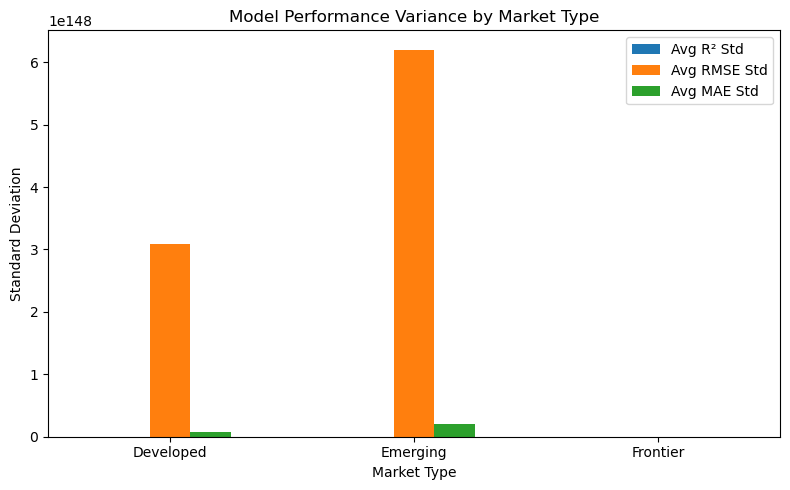

In [4]:
import matplotlib.pyplot as plt

variance_comparison.plot(kind="bar", figsize=(8, 5), title="Model Performance Variance by Market Type")
plt.ylabel("Standard Deviation")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Define trading result files
trading_files = {
    "USA": "usa_trading_results.csv",
    "UK": "uk_trading_results.csv",
    "India": "India_trading_results.csv",
    "China": "china_trading_results.csv",
    "Frontier": "fm_trading_results.csv",
}

market_types = {
    "USA": "Developed",
    "UK": "Developed",
    "India": "Emerging",
    "China": "Emerging",
    "Frontier": "Frontier",
}

# Load and tag each file
trading_data = []

for market, file in trading_files.items():
    df = pd.read_csv(file)
    df["Market"] = market
    df["Category"] = market_types[market]
    trading_data.append(df)

# Combine into one DataFrame
df_trades = pd.concat(trading_data, ignore_index=True)

avg_table = (
    df_trades.groupby(["Market", "Category"])
    [["Profit", "Annualized Return", "Max Drawdown"]]
    .mean()
    .round(4)
    .reset_index()
)

print("\n📊 Table 1: Average Trading Metrics by Market & Model Type")
print(avg_table)

# Sort and pick best by metric
best_profit = df_trades.sort_values(by="Profit", ascending=False).groupby("Market").first()
best_annret = df_trades.sort_values(by="Annualized Return", ascending=False).groupby("Market").first()
best_drawdown = df_trades.sort_values(by="Max Drawdown").groupby("Market").first()

# Combine results
table2 = pd.DataFrame({
    "Best Profit Model": best_profit["Category"],
    "Profit": best_profit["Profit"],
    "Best Return Model": best_annret["Category"],
    "Annualized Return": best_annret["Annualized Return"],
    "Best Drawdown Model": best_drawdown["Category"],
    "Max Drawdown": best_drawdown["Max Drawdown"]
}).round(4)

print("\n📊 Table 2: Best Model per Market by Each Trading Metric")
print(table2)

table3 = (
    df_trades.groupby("Category")
    [["Profit", "Annualized Return", "Max Drawdown"]]
    .mean()
    .round(4)
    .sort_values(by="Profit", ascending=False)
)

print("\n📊 Table 3: Global Trading Model Leaderboard")
print(table3)

table4 = (
    df_trades.groupby("Category")[["Profit", "Annualized Return", "Max Drawdown"]]
    .mean()
    .round(4)
)

print("\n📊 Table 4: Average Trading Metrics by Market Type")
print(table4)

table5 = (
    df_trades.groupby("Category")[["Profit", "Annualized Return", "Max Drawdown"]]
    .mean()
    .round(4)
)

print("\n📊 Table 5: Average Trading Metrics by Model Type")
print(table5)

best_by_market_type = (
    df_trades.sort_values(by="Profit", ascending=False)
    .groupby("Category")
    .first()[["Profit", "Annualized Return", "Max Drawdown"]]
    .reset_index()
    .rename(columns={"Category": "Best Profit Model"})
)

print("\n📊 Table 6: Best Model by Market Type")
print(best_by_market_type)


📊 Table 1: Average Trading Metrics by Market & Model Type
     Market   Category      Profit  Annualized Return  Max Drawdown
0     China   Emerging -33136.7936            -5.5352       46.7995
1  Frontier   Frontier  15121.0964             1.8027       37.8091
2     India   Emerging -56075.5905           -13.5326       65.5485
3        UK  Developed -25176.5858            -4.6300       52.4669
4       USA  Developed -35441.9969            -6.2033       64.0261

📊 Table 2: Best Model per Market by Each Trading Metric
         Best Profit Model    Profit Best Return Model  Annualized Return  \
Market                                                                      
China             Emerging  -3917.76          Emerging              -0.53   
Frontier          Frontier  18032.86          Frontier               2.13   
India             Emerging  17284.65          Emerging              16.71   
UK               Developed  89548.58         Developed               8.44   
USA           

In [7]:
import pandas as pd

# Define trading result files
trading_files = {
    "USA": "usa_trading_results.csv",
    "UK": "uk_trading_results.csv",
    "India": "India_trading_results.csv",
    "China": "china_trading_results.csv",
    "Frontier": "fm_trading_results.csv",
}

market_types = {
    "USA": "Developed",
    "UK": "Developed",
    "India": "Emerging",
    "China": "Emerging",
    "Frontier": "Frontier",
}

# Load and tag each file
trading_data = []

for market, file in trading_files.items():
    df = pd.read_csv(file)
    df["Market"] = market
    df["Market Type"] = market_types[market]
    trading_data.append(df)

# Combine into one DataFrame
df_trades = pd.concat(trading_data, ignore_index=True)

# ──────────────────────────────
# Table 1: Average by Market + Category
avg_table = (
    df_trades.groupby(["Market", "Category"])
    [["Profit", "Annualized Return", "Max Drawdown"]]
    .mean()
    .round(4)
    .reset_index()
)
print("\n📊 Table 1: Average Trading Metrics by Market & Model Category")
print(avg_table)

# ──────────────────────────────
# Table 2: Best Model per Market by each trading metric
best_profit = df_trades.sort_values(by="Profit", ascending=False).groupby("Market").first()
best_annret = df_trades.sort_values(by="Annualized Return", ascending=False).groupby("Market").first()
best_drawdown = df_trades.sort_values(by="Max Drawdown").groupby("Market").first()

table2 = pd.DataFrame({
    "Best Profit Model": best_profit["Model"],
    "Profit": best_profit["Profit"],
    "Best Return Model": best_annret["Model"],
    "Annualized Return": best_annret["Annualized Return"],
    "Best Drawdown Model": best_drawdown["Model"],
    "Max Drawdown": best_drawdown["Max Drawdown"]
}).round(4)
print("\n📊 Table 2: Best Model per Market by Each Trading Metric")
print(table2)

# ──────────────────────────────
# Table 3: Global Model Leaderboard
table3 = (
    df_trades.groupby("Model")[["Profit", "Annualized Return", "Max Drawdown"]]
    .mean()
    .round(4)
    .sort_values(by="Profit", ascending=False)
)
print("\n📊 Table 3: Global Trading Model Leaderboard")
print(table3)

# ──────────────────────────────
# Table 4: Market Type Level Performance (averaged across all models)
table4 = (
    df_trades.groupby("Market Type")[["Profit", "Annualized Return", "Max Drawdown"]]
    .mean()
    .round(4)
)
print("\n📊 Table 4: Average Trading Metrics by Market Type")
print(table4)

# ──────────────────────────────
# Table 5: Performance by Model Category (ML, TS, Fusion)
table5 = (
    df_trades.groupby("Category")[["Profit", "Annualized Return", "Max Drawdown"]]
    .mean()
    .round(4)
)
print("\n📊 Table 5: Average Trading Metrics by Model Category")
print(table5)

# ──────────────────────────────
# Table 6: Best Model by Market Type (by Profit)
best_by_market_type = (
    df_trades.sort_values(by="Profit", ascending=False)
    .groupby("Market Type")
    .first()
    .reset_index()
)[["Market Type", "Model", "Profit", "Annualized Return", "Max Drawdown"]]
best_by_market_type = best_by_market_type.rename(columns={"Model": "Best Profit Model"})
print("\n📊 Table 6: Best Model by Market Type")
print(best_by_market_type)


📊 Table 1: Average Trading Metrics by Market & Model Category
      Market Category      Profit  Annualized Return  Max Drawdown
0      China   Fusion -32387.7425            -5.5500       48.0400
1      China       ML -34035.6550            -5.5175       45.3108
2      China       TS -32387.7425            -5.5500       48.0400
3   Frontier   Fusion  18032.8600             2.1300       48.1500
4   Frontier       ML  11626.9800             1.4100       25.4000
5   Frontier       TS  18032.8600             2.1300       48.1500
6      India   Fusion -49946.0944           -10.6259       64.1285
7      India       ML -63309.1667           -16.9458       67.2392
8      India       TS -50044.3992           -10.7575       64.0767
9         UK   Fusion -27626.5058            -5.3550       58.9192
10        UK       ML -22236.6817            -3.7600       44.7242
11        UK       TS -27626.5058            -5.3550       58.9192
12       USA   Fusion -28781.3242            -5.0233       67.3875